<a href="https://colab.research.google.com/github/omeryarchi/Image_classification/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q tensorflow tensorflow-datasets

## Import Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

tfds.disable_progress_bar()

##Find Datasets

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

##Get information on the data

In [4]:
builder = tfds.builder("rock_paper_scissors")
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

##Prepare Rock, Paper, Scissors Data

In [5]:
ds_train = tfds.load(name = "rock_paper_scissors", split = "train")
ds_test = tfds.load(name = "rock_paper_scissors", split = "test")

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete2WP0ZQ/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete2WP0ZQ/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


##Show examples

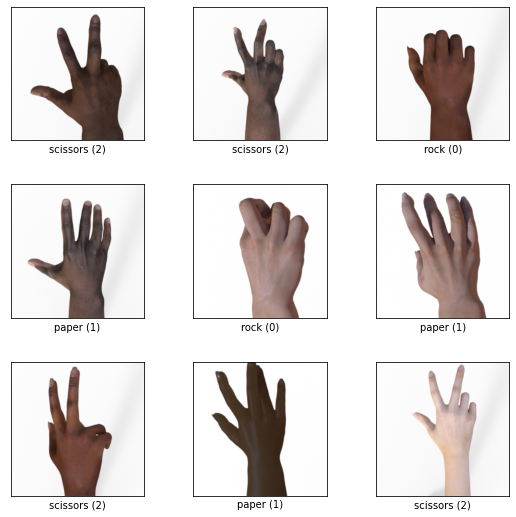

In [6]:
fig = tfds.show_examples(info, ds_train)

##Additional Data prep

In [7]:
train_images = np.array([example["image"].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example["label"].numpy() for example in ds_train])

test_images = np.array([example["image"].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example["label"].numpy() for example in ds_test])

In [8]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255


##Train a network

In [35]:
model = keras.Sequential([
  keras.layers.Flatten(),                        
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dense(3, activation="softmax")                          
])

model.compile(optimizer="adam",
              loss = keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 20s 257ms/step - loss: 1.0990 - accuracy: 0.3139
Epoch 2/5
79/79 [==============================] - 20s 258ms/step - loss: 1.0989 - accuracy: 0.3087
Epoch 3/5
79/79 [==============================] - 20s 257ms/step - loss: 1.0987 - accuracy: 0.3222
Epoch 4/5
79/79 [==============================] - 20s 257ms/step - loss: 1.0988 - accuracy: 0.3234
Epoch 5/5
79/79 [==============================] - 20s 259ms/step - loss: 1.0987 - accuracy: 0.3333


In [34]:
model.evaluate(test_images, test_labels)

#Overfit

12/12 [==============================] - 1s 82ms/step - loss: 1.0986 - accuracy: 0.3333


[1.098616600036621, 0.3333333432674408]

## Train a network (convolution)

In [11]:
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation="relu", input_shape=(300, 300, 1)),
  keras.layers.Conv2D(32, 3, activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation="softmax")                          
])
  
model.compile(optimizer="adam",
              loss = keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
 2/79 [..............................] - ETA: 13s - loss: 19.5706 - accuracy: 0.2969WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0526s vs `on_train_batch_end` time: 0.1244s). Check your callbacks.


79/79 [==============================] - 13s 171ms/step - loss: 5.0968 - accuracy: 0.6111
Epoch 2/5
79/79 [==============================] - 14s 173ms/step - loss: 0.3219 - accuracy: 0.9238
Epoch 3/5
79/79 [==============================] - 14s 175ms/step - loss: 0.0546 - accuracy: 0.9897
Epoch 4/5
79/79 [==============================] - 14s 171ms/step - loss: 0.0243 - accuracy: 0.9960
Epoch 5/5
79/79 [==============================] - 13s 169ms/step - loss: 0.0110 - accuracy: 0.9988


In [13]:
model.evaluate(test_images, test_labels)

#Overfit

12/12 [==============================] - 1s 49ms/step - loss: 1.4917 - accuracy: 0.5538


[1.4917019605636597, 0.5537634491920471]

##A better convolutional network

In [35]:
model = keras.Sequential([
  keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
  keras.layers.Conv2D(64, 3, activation="relu", input_shape=(300, 300, 1)),
  keras.layers.Conv2D(32, 3, activation="relu"),
  keras.layers.MaxPool2D(2, 2),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(3, activation="softmax")                          
])
  
model.compile(optimizer="adam",
              loss = keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 2s 28ms/step - loss: 0.7545 - accuracy: 0.7159
Epoch 2/5
79/79 [==============================] - 2s 27ms/step - loss: 0.0792 - accuracy: 0.9813
Epoch 3/5
79/79 [==============================] - 2s 27ms/step - loss: 0.0212 - accuracy: 0.9968
Epoch 4/5
79/79 [==============================] - 2s 27ms/step - loss: 0.0178 - accuracy: 0.9972
Epoch 5/5
79/79 [==============================] - 2s 27ms/step - loss: 0.0049 - accuracy: 0.9996


In [38]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 11ms/step - loss: 1.8676 - accuracy: 0.6048


[1.8675904273986816, 0.6048387289047241]

##Hyperparameter tuning

In [ ]:
pip install -U keras-tuner

In [40]:
from kerastuner.tuners import RandomSearch

In [44]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)))
  model.add(keras.layers.Conv2D(64, 3, activation="relu", input_shape=(300, 300, 1)))
  model.add(keras.layers.Conv2D(32, 3, activation="relu"))
  model.add(keras.layers.MaxPool2D(2, 2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation="relu"))
  model.add(keras.layers.Dense(3, activation="softmax"))

  model.compile(optimizer="adam",
              loss = keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ["accuracy"])
  return model

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials=32
  )

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


Epoch 1/10
 2/79 [..............................] - ETA: 2s - loss: 1.1535 - accuracy: 0.4375WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0181s vs `on_train_batch_end` time: 0.0389s). Check your callbacks.


79/79 [==============================] - 7s 90ms/step - loss: 0.9747 - accuracy: 0.8103 - val_loss: 0.9159 - val_accuracy: 0.7392
Epoch 2/10
79/79 [==============================] - 4s 46ms/step - loss: 0.0292 - accuracy: 0.9937 - val_loss: 1.0862 - val_accuracy: 0.7151
Epoch 3/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 1.2755 - val_accuracy: 0.6909
Epoch 4/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 1.9516 - val_accuracy: 0.6667
Epoch 5/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 2.0136 - val_accuracy: 0.7285
Epoch 6/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.2564 - val_accuracy: 0.7312
Epoch 7/10
79/79 [==============================] - 4s 45ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 2.4043 - val_accuracy: 0.6694
Epoch 8/10
79/79 [======

Epoch 1/10
 1/79 [..............................] - ETA: 0s - loss: 1.1232 - accuracy: 0.3438WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0129s vs `on_train_batch_end` time: 0.0219s). Check your callbacks.


79/79 [==============================] - 3s 36ms/step - loss: 0.6199 - accuracy: 0.7758 - val_loss: 0.7259 - val_accuracy: 0.7177
Epoch 2/10
79/79 [==============================] - 3s 35ms/step - loss: 0.0585 - accuracy: 0.9885 - val_loss: 0.6502 - val_accuracy: 0.7554
Epoch 3/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.8175 - val_accuracy: 0.7392
Epoch 4/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.8140 - val_accuracy: 0.7554
Epoch 5/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.9187 - val_accuracy: 0.7151
Epoch 6/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.9201 - val_accuracy: 0.7258
Epoch 7/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.0564 - val_accuracy: 0.7151
Epoch 8/10
79/79 [======

Epoch 1/10
79/79 [==============================] - 3s 33ms/step - loss: 0.6711 - accuracy: 0.7044 - val_loss: 0.6889 - val_accuracy: 0.7366
Epoch 2/10
79/79 [==============================] - 3s 32ms/step - loss: 0.1163 - accuracy: 0.9762 - val_loss: 0.7377 - val_accuracy: 0.7473
Epoch 3/10
79/79 [==============================] - 2s 32ms/step - loss: 0.0229 - accuracy: 0.9937 - val_loss: 0.6888 - val_accuracy: 0.7527
Epoch 4/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0074 - accuracy: 0.9996 - val_loss: 0.7761 - val_accuracy: 0.7124
Epoch 5/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.9172 - val_accuracy: 0.6774
Epoch 6/10
79/79 [==============================] - 2s 32ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.7599 - val_accuracy: 0.7796
Epoch 7/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.7524 - val_accuracy: 0.7500
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 3s 40ms/step - loss: 0.8828 - accuracy: 0.6825 - val_loss: 0.7614 - val_accuracy: 0.6989
Epoch 2/10
79/79 [==============================] - 3s 34ms/step - loss: 0.0770 - accuracy: 0.9837 - val_loss: 0.8198 - val_accuracy: 0.6935
Epoch 3/10
79/79 [==============================] - 3s 39ms/step - loss: 0.0159 - accuracy: 0.9984 - val_loss: 1.0611 - val_accuracy: 0.7070
Epoch 4/10
79/79 [==============================] - 3s 39ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.2320 - val_accuracy: 0.7151
Epoch 5/10
79/79 [==============================] - 3s 34ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.3457 - val_accuracy: 0.7097
Epoch 6/10
79/79 [==============================] - 3s 34ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3645 - val_accuracy: 0.7151
Epoch 7/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3343 - val_accuracy: 0.7043
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 4s 52ms/step - loss: 0.7995 - accuracy: 0.7484 - val_loss: 0.8069 - val_accuracy: 0.5753
Epoch 2/10
79/79 [==============================] - 4s 52ms/step - loss: 0.0951 - accuracy: 0.9730 - val_loss: 0.8166 - val_accuracy: 0.6640
Epoch 3/10
79/79 [==============================] - 3s 38ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.8949 - val_accuracy: 0.6559
Epoch 4/10
79/79 [==============================] - 4s 53ms/step - loss: 0.0129 - accuracy: 0.9968 - val_loss: 1.2926 - val_accuracy: 0.6747
Epoch 5/10
79/79 [==============================] - 3s 37ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6335 - val_accuracy: 0.6559
Epoch 6/10
79/79 [==============================] - 3s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.6212 - val_accuracy: 0.6694
Epoch 7/10
79/79 [==============================] - 3s 37ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.6380 - val_accuracy: 0.6747
Epoch 8/10
79

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [45]:
best_model = tuner.get_best_models()[0]

In [53]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 12ms/step - loss: 0.7599 - accuracy: 0.7796


[0.7599302530288696, 0.7795698642730713]

In [47]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 99, 99, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 97, 97, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 70688)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

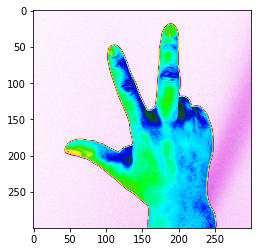

In [81]:
image = train_images[0].reshape(300, 300)

plt.imshow(image, cmap="gist_ncar")